Stock: GOOGL


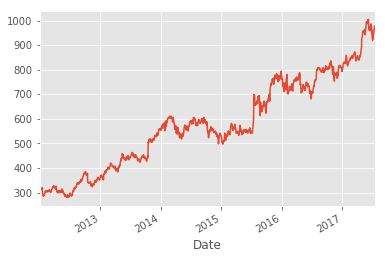

In [26]:
import get_stock_data as gd
import stock_plot as sp
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import pandas as pd
import pickle
import os
df = gd.get_stock_data('GOOGL')
df.dropna()
sp.single_index_plot(df, 'Close')
price = df['Close']
rate = np.array(price.shift(1) / price - 1)
rate = rate[1:]
plt.show()

In [27]:
from scipy.stats import norm
from scipy.stats import expon
import matplotlib.pyplot as plt
import math

def acummulated_norm(x, rate, begin, end):
    an = np.array([norm.pdf(x, loc = mu, scale=0.007) for mu in rate[begin:end]])
    w = np.array([expon.pdf(x, loc=0, scale=1) for x in 0.1*np.arange(1, end-begin + 1)])
    #w = w/sum(w)
    val = np.dot(w,an)
    return val

data_size = len(rate)
time_lag = 15
begin = 0
end = begin + time_lag
correct_prediction = 0
prediction = 0

for i in range(data_size - time_lag-1):
    prediction = prediction + 1
    xx = np.linspace(-0.05,0.05,1000)
    yy = acummulated_norm(xx, rate, begin, end) 
    predict = xx[np.argmax(yy)]
    # count the number of correct prediction of the direction
    if rate[end+1] * predict > 0:
        correct_prediction = correct_prediction + 1
    # plt.show()
    begin = begin + 1
    end = end + 1

print(correct_prediction/prediction)

0.5018181818181818


In [28]:
#time_lag adjust
result = []
for time_lag in range(8,30):
    begin = 0
    end = begin + time_lag
    correct_prediction = 0
    prediction = 0

    for i in range(data_size - time_lag-1):
        prediction = prediction + 1
        xx = np.linspace(-0.05,0.05,1000)
        yy = acummulated_norm(xx, rate, begin, end) 
        predict = xx[np.argmax(yy)]
        # count the number of correct prediction of the direction
        if rate[end+1] * predict > 0:
            correct_prediction = correct_prediction + 1
        # plt.show()
        begin = begin + 1
        end = end + 1
    
    print(correct_prediction/prediction)
    result.append(correct_prediction/prediction)

0.49855282199710566
0.4945691527878349
0.48478260869565215
0.5025380710659898
0.5014513788098693
0.5061728395061729
0.5109011627906976
0.5018181818181818
0.49199417758369723
0.48215586307356156
0.4970845481049563
0.49161196207148067
0.4846715328467153
0.4864864864864865
0.48903508771929827
0.4667154352596928
0.4802342606149341
0.47985347985347987
0.4912023460410557
0.4886280264123258
0.4765051395007342
0.4695077149155033


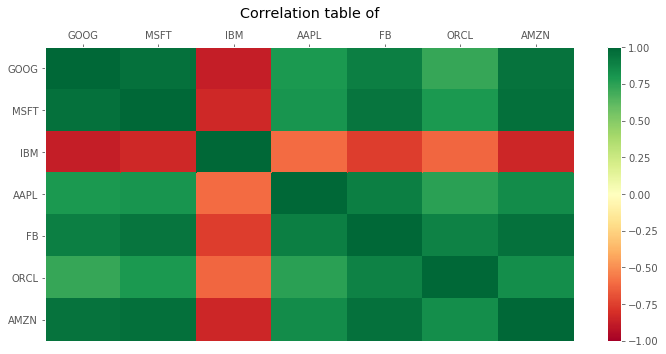

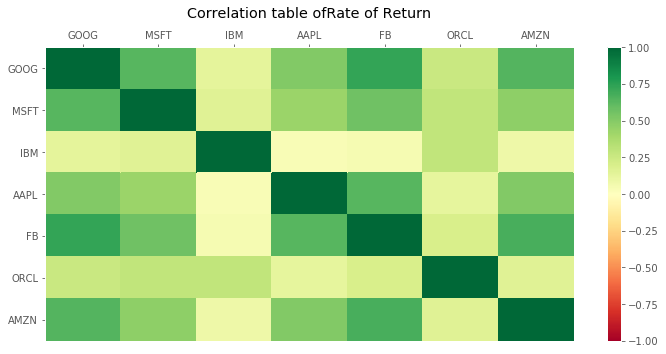

(<module 'matplotlib.pyplot' from '/Users/lee/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 None)

In [29]:
# corrlation table
def visualize_cor_table(stocks , rate = False):
    if not rate:
        df = pd.read_csv('sp500_joined_closes.csv')
    if rate:
        df = pd.read_csv('sp500_joined_rates.csv')
    df = df[stocks]
    '''
        #choose number of stocks involved
        #df = df.ix[:,0:10]
        #choose several particular stock involve
        #df = df[['GOOG','MSFT','IBM','AAPL','FB','ORCL','AMZN']]
        '''
    # we can see the whole correlation table
    df_corr = df.corr()
    data1 = df_corr.values
    # build a correlation plot
    plt.style = 'ggplot'
    fig1 = plt.figure(figsize=(10,5))
    plt.title('Correlation table of' + 'Rate of Return'*rate + 'Price of Stock'*(rate-1), y=1.08)
    ax1 = fig1.add_subplot(111)
    # red for negtive correlation and green for positive correlation and yellow for no corelation
    heatmap1 = ax1.pcolor(data1, cmap=cm.RdYlGn)
    fig1.colorbar(heatmap1)
    ax1.set_xticks(arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    #xticks(rotation = 90)
    heatmap1.set_clim(-1, 1)
    tight_layout()
    #plt.savefig('correlations.png', dpi = (300))
    
stocks = ['GOOG','MSFT','IBM','AAPL','FB','ORCL','AMZN']
visualize_cor_table(stocks)
plt.savefig('close_price_correlations.png', dpi = (300))
plt.show()
visualize_cor_table(stocks, rate = True)
plt.savefig('rate_return_correlations.png', dpi = (300))
plt,show()

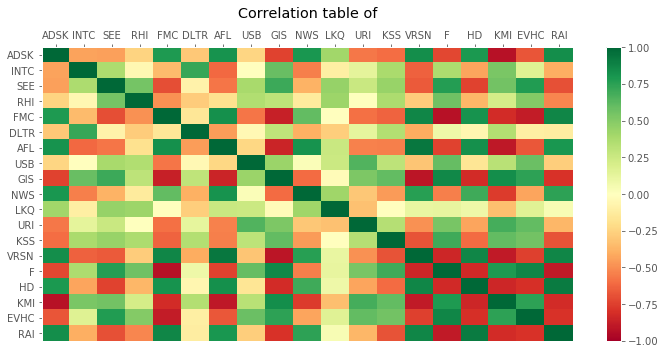

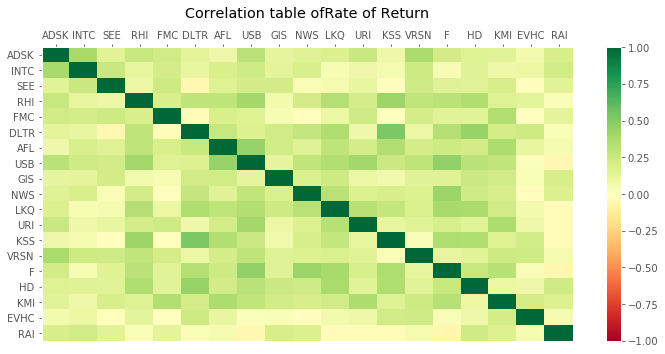

(<module 'matplotlib.pyplot' from '/Users/lee/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 None)

In [74]:
from random import shuffle
with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)

# there might be tickers that the web can not reach
tickers= [t for t in tickers if os.path.exists('stock_dfs/{}.csv'.format(t))]
shuffle(tickers)

stocks = tickers[1:20]
visualize_cor_table(stocks)
plt.savefig('close_price_correlations.png', dpi = (300))
plt.show()
visualize_cor_table(stocks, rate = True)
plt.savefig('rate_return_correlations.png', dpi = (300))
plt,show()

/Users/lee/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/lee/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/lee/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/lee/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated

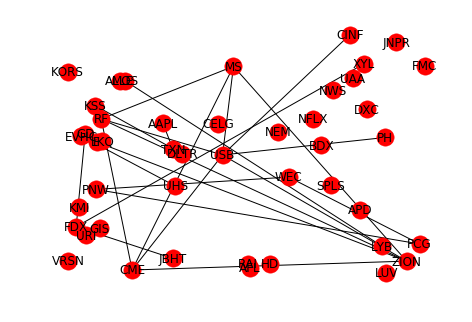

In [79]:
import networkx as nx
def cor_table(stocks , rate = False):
    if not rate:
        df = pd.read_csv('sp500_joined_closes.csv')
    if rate:
        df = pd.read_csv('sp500_joined_rates.csv')
    df = df[stocks]
    '''
        #choose number of stocks involved
        #df = df.ix[:,0:10]
        #choose several particular stock involve
        #df = df[['GOOG','MSFT','IBM','AAPL','FB','ORCL','AMZN']]
        '''
    # we can see the whole correlation table
    df_corr = df.corr()
    return df_corr

tickers = tickers[1:50]
G=nx.Graph()
G.add_nodes_from(tickers)
correlation_table =  cor_table(tickers, rate = True)
edges = [(x,y) for x in tickers for y in tickers if correlation_table[x][y] > 0.5]
G.add_edges_from(edges)
nx.draw_random(G, with_labels = True, node_size = 300)
plt.show()